# Project 3 - Parte 4

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr, beta
from statsmodels.stats.weightstats import ztest as ztest
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

from scipy.stats import ttest_ind, norm, t
from scipy.stats import f_oneway
from scipy.stats import sem

In [4]:
df = pd.read_csv("C:\\Users\\tatan\\Desktop\\repo_course\\project-3-ironhack-delivery-es\\project_dataset\\python_raw_data\\fake_orders_test.csv")

In [5]:
df.head()

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
0,33557880,2019-03-10 23:59:59.000000,AR,14200,DeliveredStatus,PAID,1,4.54,8.64
1,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76
2,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86
3,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00
4,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48


In [6]:
df[df["payment_status"]=="NOT_PAID"]

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
67,33560139,2019-03-10 23:27:52.000000,EC,41224,CanceledStatus,NOT_PAID,2,5.30,0.00
285,33551748,2019-03-10 22:37:49.000000,AR,57884,CanceledStatus,NOT_PAID,2,7.99,7.99
386,33549754,2019-03-10 22:19:57.000000,AR,62842,DeliveredStatus,NOT_PAID,2,11.84,12.40
482,33514699,2019-03-10 22:07:04.000000,ES,5257,DeliveredStatus,NOT_PAID,1,14.25,14.95
541,33471578,2019-03-10 21:59:47.000000,TR,62031,DeliveredStatus,NOT_PAID,2,3.35,4.46
...,...,...,...,...,...,...,...,...,...
59824,32052359,2019-03-01 11:00:23.000000,EC,51363,DeliveredStatus,NOT_PAID,2,8.99,16.36
60051,32044836,2019-03-01 10:05:17.000000,EC,31866,DeliveredStatus,NOT_PAID,1,3.96,5.72
60104,32009112,2019-03-01 10:01:40.000000,FR,3160,DeliveredStatus,NOT_PAID,2,6.80,7.40
60394,32002340,2019-03-01 00:09:21.000000,AR,14455,DeliveredStatus,NOT_PAID,2,5.14,5.14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60400 entries, 0 to 60399
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               60400 non-null  int64  
 1   activation_time_local  60400 non-null  object 
 2   country_code           60400 non-null  object 
 3   store_address          60400 non-null  int64  
 4   final_status           60400 non-null  object 
 5   payment_status         60400 non-null  object 
 6   products               60400 non-null  int64  
 7   products_total         60400 non-null  float64
 8   purchase_total_price   60400 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 4.1+ MB


 #### 1. ¿Qué porcentaje de pedidos están subautorizados?

In [8]:
pedidos_subautorizados = df[df['purchase_total_price'] < df['products_total']]
pedidos_subautorizados

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
3,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00
6,33524023,2019-03-10 23:57:06.000000,EG,73739,DeliveredStatus,PAID,3,10.19,1.61
9,33557565,2019-03-10 23:53:55.000000,AR,27750,CanceledStatus,PAID,1,2.59,0.00
11,33557508,2019-03-10 23:52:55.000000,AR,13040,CanceledStatus,PAID,2,5.73,0.00
14,33560469,2019-03-10 23:51:54.000000,PA,18149,DeliveredStatus,PAID,1,5.71,5.33
...,...,...,...,...,...,...,...,...,...
60390,32002613,2019-03-01 00:14:50.000000,AR,63293,DeliveredStatus,PAID,1,11.62,8.71
60391,32002597,2019-03-01 00:14:36.000000,AR,33453,CanceledStatus,PAID,1,2.68,0.00
60392,32005602,2019-03-01 00:11:00.000000,PE,59011,CanceledStatus,PAID,1,6.65,0.00
60396,32002079,2019-03-01 00:03:53.000000,AR,50175,CanceledStatus,PAID,1,3.80,0.00


In [8]:
porcentaje_pedidos_subautorizados = round(len(pedidos_subautorizados) / len(df) * 100, 2)
porcentaje_pedidos_subautorizados

21.96

### 2. ¿Qué porcentaje de pedidos se autorizarían correctamente con una autorización incremental (+20%) sobre el monto en el checkout?

In [9]:
pedidos_subautorizados_20 = df[df['purchase_total_price'] * 1.2 < df['products_total']]
pedidos_subautorizados_20

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
3,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00
6,33524023,2019-03-10 23:57:06.000000,EG,73739,DeliveredStatus,PAID,3,10.19,1.61
9,33557565,2019-03-10 23:53:55.000000,AR,27750,CanceledStatus,PAID,1,2.59,0.00
11,33557508,2019-03-10 23:52:55.000000,AR,13040,CanceledStatus,PAID,2,5.73,0.00
15,33560467,2019-03-10 23:51:46.000000,PE,51257,CanceledStatus,PAID,1,5.38,0.00
...,...,...,...,...,...,...,...,...,...
60390,32002613,2019-03-01 00:14:50.000000,AR,63293,DeliveredStatus,PAID,1,11.62,8.71
60391,32002597,2019-03-01 00:14:36.000000,AR,33453,CanceledStatus,PAID,1,2.68,0.00
60392,32005602,2019-03-01 00:11:00.000000,PE,59011,CanceledStatus,PAID,1,6.65,0.00
60396,32002079,2019-03-01 00:03:53.000000,AR,50175,CanceledStatus,PAID,1,3.80,0.00


In [10]:
porcentaje_pedidos_subautorizados_20 = 100 - round(len(pedidos_subautorizados_20) / len(df) * 100, 2) 
porcentaje_pedidos_subautorizados_20

86.22

### 3. Hay diferencias cuando se dividen por país?

In [37]:
diferencia = pedidos_subautorizados[["country_code", "products_total", "purchase_total_price"]].groupby("country_code").agg(sum).sort_values("products_total", ascending=False)
diferencia_total = diferencia["products_total"] - diferencia["purchase_total_price"]
diferencia_total

country_code
ES    19822.95
AR    13913.58
IT     5867.54
PE     5758.16
FR     3725.23
UA     5369.47
RO     3707.11
TR     3605.61
EC     2659.69
MA     3392.09
PA     2198.32
PT     2180.36
CR      969.27
EG     1223.75
GT      720.10
GE      584.64
DO      353.66
UY      530.58
PR      125.95
KE      146.97
CL       19.25
BR        6.01
CI        0.08
dtype: float64

In [38]:
diferencia_con_20 = pedidos_subautorizados_20[["country_code", "products_total", "purchase_total_price"]].groupby("country_code").agg(sum).sort_values("products_total", ascending=False)
diferencia_total_con_20 = diferencia_con_20["products_total"] - diferencia_con_20["purchase_total_price"]
diferencia_total_con_20

country_code
ES    18299.43
AR    13475.54
IT     5504.65
PE     5411.87
UA     5176.09
RO     3506.85
TR     3447.84
FR     3240.81
MA     3334.45
EC     2551.48
PT     2109.98
PA     2121.84
EG     1190.49
CR      791.95
GT      684.09
GE      549.29
UY      521.59
DO      304.35
KE      143.13
PR      116.02
CL       19.25
BR        6.01
CI        0.08
dtype: float64

In [28]:
pedidos_subautorizados[["country_code", "products_total", "purchase_total_price"]].groupby("country_code").count().sort_values("products_total", ascending=False)

,products_total,purchase_total_price
country_code,,
ES,3195,3195
AR,2842,2842
TR,1130,1130
PE,866,866
IT,852,852
UA,793,793
FR,607,607
RO,474,474
EC,431,431


In [68]:
pedidos_subautorizados_20[["country_code", "products_total"]].groupby("country_code").count().sort_values("products_total", ascending=False)

,products_total
country_code,
AR,2102
ES,1741
TR,768
UA,565
IT,528
PE,493
RO,295
EC,285
MA,259


### 4. Para el resto de pedidos que quedarían fuera de la autorización incremental, ¿qué valores serían necesarios para capturar el monto restante?

In [40]:
#Total
df_monto_restante = diferencia_con_20["products_total"].sum() - diferencia_con_20["purchase_total_price"].sum()
df_monto_restante

72507.08

In [41]:
#Por país
diferencia_total_con_20

country_code
ES    18299.43
AR    13475.54
IT     5504.65
PE     5411.87
UA     5176.09
RO     3506.85
TR     3447.84
FR     3240.81
MA     3334.45
EC     2551.48
PT     2109.98
PA     2121.84
EG     1190.49
CR      791.95
GT      684.09
GE      549.29
UY      521.59
DO      304.35
KE      143.13
PR      116.02
CL       19.25
BR        6.01
CI        0.08
dtype: float64

### 5. ¿Qué tiendas son las más problemáticas en términos de pedidos y valor monetario?

In [ ]:
# Valor monetario

tiendas_problematicas_20 = pedidos_subautorizados_20[["store_address", "products_total", "purchase_total_price"]].groupby("store_address").sum().sort_values("products_total", ascending=False)
tiendas_problematicas_20_total = tiendas_problematicas_20.copy()
tiendas_problematicas_20_total["total"] = tiendas_problematicas_20["products_total"] - tiendas_problematicas_20["purchase_total_price"]

tiendas_problematicas_20_total = tiendas_problematicas_20_total.sort_values("total", ascending=False)
tiendas_problematicas_20_total.head()

,products_total,purchase_total_price,total
store_address,,,
10695,781.44,347.85,433.59
28669,400.25,0.02,400.23
9089,689.53,309.82,379.71
71424,394.30,30.36,363.94
65898,390.78,30.40,360.38


In [69]:
#Pedidos

tiendas_problematicas_20_pedidos = pedidos_subautorizados_20[["store_address", "products_total"]].groupby("store_address").count().sort_values("products_total", ascending=False)
tiendas_problematicas_20_pedidos.head()


,products_total
store_address,
10695,51
28675,44
44520,33
15144,33
9089,31


### 6. Para los pedidos subautorizados, ¿hay una correlación entre la diferencia en los precios y la cancelación del pedido? En otras palabras: ¿Es más probable que se cancele un pedido a medida que aumenta la diferencia de precio?

In [74]:
pedidos_subautorizados.value_counts("final_status")

final_status
DeliveredStatus    7212
CanceledStatus     6053
Name: count, dtype: int64

In [77]:
corr = pedidos_subautorizados.copy()
corr["total"] = corr["products_total"] - corr["purchase_total_price"]
corr.head()

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,total
3,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00,12.95
6,33524023,2019-03-10 23:57:06.000000,EG,73739,DeliveredStatus,PAID,3,10.19,1.61,8.58
9,33557565,2019-03-10 23:53:55.000000,AR,27750,CanceledStatus,PAID,1,2.59,0.00,2.59
11,33557508,2019-03-10 23:52:55.000000,AR,13040,CanceledStatus,PAID,2,5.73,0.00,5.73
14,33560469,2019-03-10 23:51:54.000000,PA,18149,DeliveredStatus,PAID,1,5.71,5.33,0.38


Correlación entre final_status y total: -0.4430569070964351


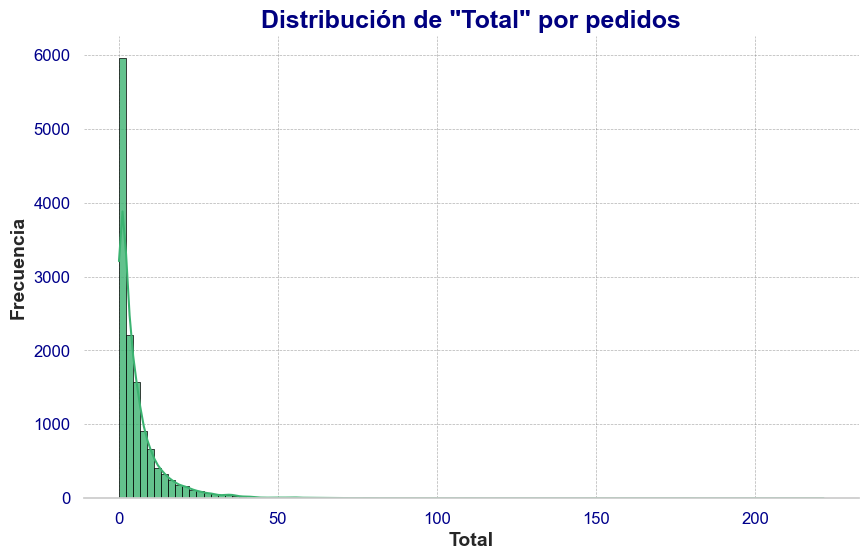

In [99]:
corr['final_status_numeric'] = corr['final_status'].map({'CanceledStatus': 0, 'DeliveredStatus': 1})

# Calcular la correlación entre 'final_status_numeric' y 'total'
correlacion = corr['final_status_numeric'].corr(corr['total'])
print("Correlación entre final_status y total:", correlacion)

sns.set(style="whitegrid")  # Fondo blanco con cuadrícula
plt.figure(figsize=(10, 6))

# Crear el histograma con una paleta de colores más vibrante y agregar transparencia a las barras
sns.histplot(corr['total'], bins=100, kde=True, color="mediumseagreen", edgecolor='black', alpha=0.8)

# Configurar detalles del gráfico para mejor apariencia
plt.title('Distribución de "Total" por pedidos', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Total', fontsize=14, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')

# Ajustar estilo de seaborn para dar un toque de color adicional
sns.despine(left=True)  # Quitar el borde izquierdo para una apariencia más moderna
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)  # Hacer el grid más sutil

# Mostrar el gráfico
plt.show()